In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
dataset = pd.read_csv('Dataset.csv')
#For train Data
dfTrain = pd.read_csv('train.csv')
column_data1 = dfTrain['radius']
column_data2 = dfTrain['height']
y_train = dfTrain['surface_area']
X_train = np.column_stack((column_data1, column_data2))

#For test Data
dfTest = pd.read_csv('test.csv')
column_data3 = dfTest['radius']
column_data4 = dfTest['height']
y_test = dfTest['surface_area']
X_test = np.column_stack((column_data3, column_data4))

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [16]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly,y_train)

LinearRegression()

In [17]:
poly_reg_prediction = poly_reg_model.predict(X_test_poly)
poly_reg_mse = mean_squared_error(y_test,poly_reg_prediction)
poly_reg_mse

2.075743250140263e-22

C:\Users\asadm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


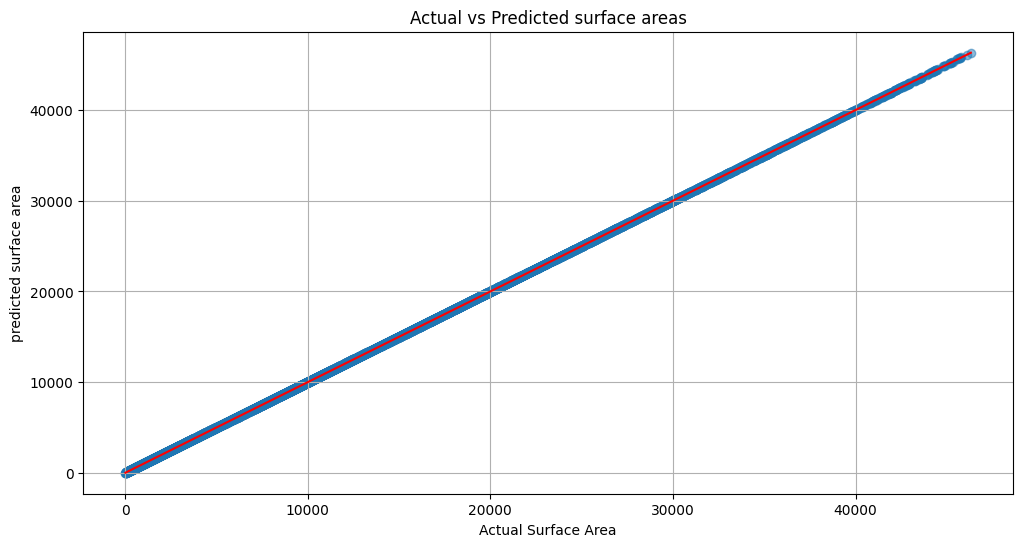

In [18]:
import matplotlib.pyplot as plt
dataset_poly = poly.transform(dataset[['radius','height']])
dataset_predictions = poly_reg_model.predict(dataset_poly)
plt.figure(figsize=(12,6))
plt.scatter(dataset['surface_area'],dataset_predictions,alpha=0.5)
plt.plot([min(dataset['surface_area']), max(dataset['surface_area'])],
         [min(dataset['surface_area']), max(dataset['surface_area'])], color='red')

plt.title('Actual vs Predicted surface areas')
plt.xlabel('Actual Surface Area')
plt.ylabel('predicted surface area')
plt.grid(True)
plt.show()

In [19]:
train_prediction = poly_reg_model.predict(X_train_poly)
poly_reg_mse_train = mean_squared_error(y_train,train_prediction)
print('Training Mean Square Error', poly_reg_mse_train)   #Mean square error (Training)

Training Mean Square Error 2.0060464081050102e-22


In [20]:
print('Testing Mean Square Error',poly_reg_mse) #mean square error (Testing)

Testing Mean Square Error 2.075743250140263e-22


In [21]:
#checking results on unseen data
unseen_data = pd.DataFrame({
    'radius' : [101,150,290,44,60],
    'height' : [10,100,120,80,360]
})

data_poly = poly.transform(unseen_data)
data_predict = poly_reg_model.predict(data_poly)

unseen_data['predicted_surface_area'] = data_predict
unseen_data['True Surface Area (Calculated Through Formula)'] = [70440.79,235619.45,747070.73,34281.06,158336.27]
unseen_data

C:\Users\asadm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


,radius,height,predicted_surface_area,True Surface Area (Calculated Through Formula)
0,101,10,70440.790479,70440.79
1,150,100,235619.449019,235619.45
2,290,120,747070.733024,747070.73
3,44,80,34281.059036,34281.06
4,60,360,158336.269741,158336.27


In [22]:
from joblib import dump
dump(poly_reg_model, f'PolyReg_model.pkl')

['PolyReg_model.pkl']